# Time-Temperature Water Mastercurve

Auto-TTS on time-temp water oscillatory sweeps.

**Data:** examples/data/temperature_sweep/time_temp_water/ttw_*_*.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rheojax.models import FractionalMaxwellModel
from rheojax.models import GeneralizedMaxwell
from rheojax.models import HerschelBulkley

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)
import arviz as az


## Load multi-temperature sweeps

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'temperature_sweep' / 'time_temp_water'
files = [p for p in DATA_DIR.glob('ttw_*_*.csv') if p.is_file()]

datasets = []
for fpath in sorted(files):
    parts = fpath.stem.split('_')
    temp_c = float(parts[1])
    df = pd.read_csv(fpath)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    df['Angular Frequency'] = pd.to_numeric(df['Angular Frequency'], errors='coerce')
    df['Storage Modulus'] = pd.to_numeric(df['Storage Modulus'], errors='coerce')
    df['Loss Modulus'] = pd.to_numeric(df['Loss Modulus'], errors='coerce')
    df = df.dropna()
    omega = df['Angular Frequency'].to_numpy()
    Gp = df['Storage Modulus'].to_numpy()
    Gpp = df['Loss Modulus'].to_numpy()
    datasets.append(RheoData(x=omega, y=Gp + 1j*Gpp, x_units='rad/s', y_units='Pa', domain='oscillation', metadata={'temperature': temp_c + 273.15}))

mc = Mastercurve(reference_temp=298.15, method='wlf', auto_shift=True)
master, shifts = mc.create_mastercurve(datasets, return_shifts=True)
print(f"Temps (C): {[round(d.metadata['temperature']-273.15,1) for d in datasets]}")


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=3.219511s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1252 | final_cost=1.0050e-04 | elapsed=3.220s | final_gradient_norm=0.0074


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.203153s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1265 | final_cost=7.3155e-05 | elapsed=2.203s | final_gradient_norm=0.0063


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.810592s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1257 | final_cost=1.3206e-04 | elapsed=1.811s | final_gradient_norm=0.0085


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.206216s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1310 | final_cost=6.0649e-05 | elapsed=2.206s | final_gradient_norm=0.3063


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.364688s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=751 | final_cost=5.0107e-04 | elapsed=1.365s | final_gradient_norm=0.0102


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.779828s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=817 | final_cost=2.7548e-04 | elapsed=1.780s | final_gradient_norm=0.0082


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.439354s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=651 | final_cost=6.4746e-04 | elapsed=1.439s | final_gradient_norm=2.0186


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.284633s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=691 | final_cost=6.4734e-04 | elapsed=1.285s | final_gradient_norm=40.9405


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.195419s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=681 | final_cost=6.3803e-04 | elapsed=1.195s | final_gradient_norm=0.5215


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.266883s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=663 | final_cost=5.7159e-04 | elapsed=1.267s | final_gradient_norm=0.9943


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.575219s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=93 | final_cost=2.3509e-04 | elapsed=0.575s | final_gradient_norm=0.0174


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.149079s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=908 | final_cost=2.2155e-04 | elapsed=2.149s | final_gradient_norm=0.3985


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.250332s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=657 | final_cost=5.7073e-04 | elapsed=1.250s | final_gradient_norm=0.4074


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.093846s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=623 | final_cost=5.6946e-04 | elapsed=1.094s | final_gradient_norm=0.4562


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.388675s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=65 | final_cost=3.1287e-04 | elapsed=0.389s | final_gradient_norm=2.2711e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.422950s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=63 | final_cost=3.1276e-04 | elapsed=0.423s | final_gradient_norm=5.6829e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.742507s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=954 | final_cost=5.7553e-04 | elapsed=1.743s | final_gradient_norm=0.1076


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.429318s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=850 | final_cost=3.0079e-04 | elapsed=1.429s | final_gradient_norm=0.0200


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.508358s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=951 | final_cost=3.2578e-04 | elapsed=1.508s | final_gradient_norm=0.1118


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.456543s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=861 | final_cost=2.5932e-04 | elapsed=1.457s | final_gradient_norm=0.0145


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.587266s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=964 | final_cost=3.1757e-04 | elapsed=1.587s | final_gradient_norm=0.2584


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.584585s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=940 | final_cost=3.1739e-04 | elapsed=1.585s | final_gradient_norm=0.0104


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.027020s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1035 | final_cost=1.6509e-04 | elapsed=2.027s | final_gradient_norm=0.0048


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.053333s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1013 | final_cost=1.5373e-04 | elapsed=2.053s | final_gradient_norm=0.0053


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.834282s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=927 | final_cost=9.9297e-05 | elapsed=1.834s | final_gradient_norm=0.0066


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.788277s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=921 | final_cost=7.8897e-05 | elapsed=1.788s | final_gradient_norm=0.0074


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.453721s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=6.2573e-05 | elapsed=0.454s | final_gradient_norm=3.4811e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.544600s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=108 | final_cost=5.3362e-05 | elapsed=0.545s | final_gradient_norm=0.6452


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.364849s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=998 | final_cost=4.0790e-04 | elapsed=2.365s | final_gradient_norm=0.0386


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.947958s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=778 | final_cost=4.0655e-04 | elapsed=1.948s | final_gradient_norm=0.0173


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.481658s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=37 | final_cost=3.6396e-04 | elapsed=0.482s | final_gradient_norm=7.6325e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.547648s


INFO:nlsq.least_squares:Convergence reason=Both `ftol` and `xtol` termination conditions are satisfied. | iterations=28 | final_cost=3.6204e-04 | elapsed=0.548s | final_gradient_norm=1.8789e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.727376s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1168 | final_cost=4.9510e-04 | elapsed=2.727s | final_gradient_norm=0.0150


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.807292s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1054 | final_cost=4.8216e-04 | elapsed=1.807s | final_gradient_norm=0.0336


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.721868s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1047 | final_cost=2.1238e-04 | elapsed=1.722s | final_gradient_norm=0.0552


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.209130s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1486 | final_cost=3.4861e-05 | elapsed=2.209s | final_gradient_norm=0.0351


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.234043s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=22 | final_cost=3.3880e-04 | elapsed=0.234s | final_gradient_norm=4.9244e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.477145s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=22 | final_cost=2.9974e-04 | elapsed=0.477s | final_gradient_norm=4.2767e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.700008s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1695 | final_cost=1.4803e-04 | elapsed=2.700s | final_gradient_norm=0.0083


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.956082s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1579 | final_cost=1.2576e-04 | elapsed=2.956s | final_gradient_norm=0.0159


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.287215s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1216 | final_cost=2.6836e-04 | elapsed=2.287s | final_gradient_norm=0.0463


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.835977s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=875 | final_cost=2.3695e-04 | elapsed=1.836s | final_gradient_norm=0.0234


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.417358s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=846 | final_cost=4.6392e-04 | elapsed=1.417s | final_gradient_norm=0.0171


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.501262s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=929 | final_cost=1.7388e-04 | elapsed=1.501s | final_gradient_norm=0.0158


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.189873s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1214 | final_cost=1.6836e-04 | elapsed=2.190s | final_gradient_norm=0.0072


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.078309s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=1270 | final_cost=1.4467e-04 | elapsed=2.078s | final_gradient_norm=0.0465


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.275657s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=8 | final_cost=0.0013 | elapsed=0.276s | final_gradient_norm=3.6022e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.254074s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=12 | final_cost=8.3929e-04 | elapsed=0.254s | final_gradient_norm=9.6001e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.399285s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=7 | final_cost=0.0018 | elapsed=0.399s | final_gradient_norm=3.3428e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.387475s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=9 | final_cost=7.7680e-04 | elapsed=0.387s | final_gradient_norm=2.3160e-05


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.264307s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=7 | final_cost=7.3386e-04 | elapsed=0.264s | final_gradient_norm=0.0057


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.269735s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=9 | final_cost=4.0192e-04 | elapsed=0.270s | final_gradient_norm=8.2283e-07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.320794s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=49 | final_cost=3.3994e-04 | elapsed=0.321s | final_gradient_norm=0.0010


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.506552s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=28 | final_cost=3.2258e-04 | elapsed=0.507s | final_gradient_norm=2.6127e-07


Temps (C): [70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 85.0, 85.0, 85.0, 85.0, 85.0, 90.0, 90.0, 90.0, 90.0, 90.0, 95.0, 95.0, 95.0, 95.0]


## Plot raw vs shifted

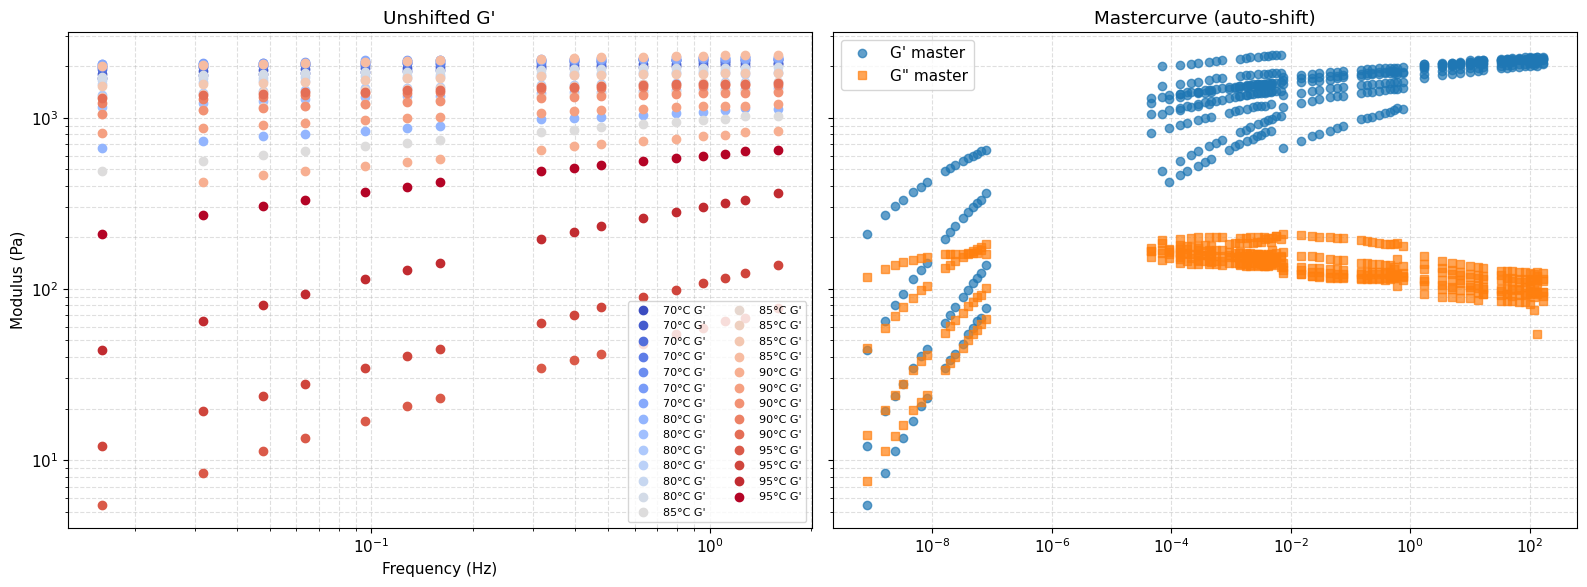

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(datasets)))
for c, data in zip(colors, datasets):
    temp_c = data.metadata['temperature'] - 273.15
    axes[0].loglog(data.x/(2*np.pi), np.real(data.y), 'o', color=c, label=f"{temp_c:.0f}°C G'")
axes[0].set_title("Unshifted G'")
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Modulus (Pa)')
axes[0].grid(True, which='both', ls='--', alpha=0.4)
axes[0].legend(ncol=2, fontsize=8)

axes[1].loglog(master.x/(2*np.pi), np.real(master.y), 'o', label="G' master", alpha=0.7)
axes[1].loglog(master.x/(2*np.pi), np.imag(master.y), 's', label='G" master', alpha=0.7)
axes[1].set_title('Mastercurve (auto-shift)')
axes[1].grid(True, which='both', ls='--', alpha=0.4)
axes[1].legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Fit models on mastercurve

In [5]:
omega_master = master.x
G_master = master.y

gm = GeneralizedMaxwell(n_modes=5, modulus_type='tensile')
gm.fit(omega_master, G_master, test_mode='oscillation', use_log_residuals=True)
gm_pred_components = gm.predict(omega_master)
gm_pred = gm_pred_components[:,0] + 1j*gm_pred_components[:,1]
gm_r2 = r2_complex(G_master, gm_pred)

fm_pred = np.full_like(G_master, np.nan)
fm_r2 = np.nan
try:
    fm = FractionalMaxwellModel()
    fm.fit(omega_master, G_master, test_mode='oscillation', use_log_residuals=True)
    fm_pred = fm.predict(omega_master, test_mode='oscillation')
    fm_r2 = r2_complex(G_master, fm_pred)
except Exception as exc:
    print(f"Fractional Maxwell fit failed: {exc}")

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})

INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=11 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.126416s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=13 | final_cost=2.1459e+07 | elapsed=1.126s | final_gradient_norm=1.8401e+07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=11 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.352131s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=13 | final_cost=2.1459e+07 | elapsed=0.352s | final_gradient_norm=1.8401e+07


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=9 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.972494s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=11 | final_cost=2.1627e+07 | elapsed=0.972s | final_gradient_norm=5.7736e+10


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=7 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.981221s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=30 | final_cost=2.2088e+07 | elapsed=0.981s | final_gradient_norm=5.9813e+09


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.987193s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=17 | final_cost=2.4994e+07 | elapsed=0.987s | final_gradient_norm=5.3073e+09


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.879871s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=79 | final_cost=4.2944e+07 | elapsed=0.880s | final_gradient_norm=3.2554e+06


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.836733s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=48 | final_cost=46.9249 | elapsed=1.837s | final_gradient_norm=8.8176


{'gm_r2': 0.7422342019864807, 'fm_r2': 0.6653420845267075}


## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

In [6]:
# Helper functions for workflow
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        """Compute R² for complex-valued data."""
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        """Convert 2-column real array to complex if needed."""
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr

NUTS_CONFIG = dict(num_chains=1, num_warmup=200, num_samples=500)  # Fast demo mode


In [7]:
def _detect_datasets():
    """Auto-detect datasets from global variables."""
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega, 'y': G_star, 'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)', 'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega, 'y': Gp + 1j * Gpp, 'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)', 'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        test_mode = master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation'
        datasets.append({
            'X': master.x, 'y': master.y, 'test_mode': test_mode,
            'x_label': 'Shifted frequency', 'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({'X': t, 'y': G, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Relaxation modulus'})
    if 't' in globals() and 'E_t' in globals():
        datasets.append({'X': t, 'y': E_t, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Relaxation modulus'})
    if 't' in globals() and 'sigma' in globals():
        datasets.append({'X': t, 'y': sigma, 'test_mode': 'relaxation', 'x_label': 'Time (s)', 'y_label': 'Stress (Pa)'})
    if 't' in globals() and 'J' in globals():
        datasets.append({'X': t, 'y': J, 'test_mode': 'creep', 'x_label': 'Time (s)', 'y_label': 'Creep compliance'})
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals, 'y': y_vals, 'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})', 'y_label': 'Stress (Pa)', 'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined.')
    return datasets

def _collect_candidate_models():
    """Collect candidate models from global variables."""
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running.')
    return models

datasets = _detect_datasets()
model_entries = _collect_candidate_models()
print(f"Found {len(datasets)} dataset(s) and {len(model_entries)} model(s)")


Found 2 dataset(s) and 2 model(s)


In [8]:
# NLSQ fitting loop - fit all models to all datasets
all_fits = {}  # {dataset_idx: [fit_records]}

for ds_idx, ds in enumerate(datasets):
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            try:
                fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
            except Exception as exc:
                print(f"Skipping {name} due to fit error: {exc}")
                continue
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue

        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue

        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue

        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    all_fits[ds_idx] = fits
    if fits:
        print(f"Dataset {ds_idx} ranking: {[(r['name'], round(r['r2'], 3)) for r in fits]}")
    else:
        print(f"Dataset {ds_idx}: No successful fits")


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.057797s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=3469.3425 | elapsed=1.058s | final_gradient_norm=3.1073


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.426853s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=3469.3425 | elapsed=0.427s | final_gradient_norm=3.1073


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.555395s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=13 | final_cost=3.7909e+04 | elapsed=0.555s | final_gradient_norm=8.4443e+07


ERROR:rheojax.core.base:Predict failed
Traceback (most recent call last):
  File "/Users/b80985/Projects/rheojax/rheojax/core/base.py", line 539, in predict
    result = self._predict(X, **kwargs)
TypeError: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Skipping gm due to predict error: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.570797s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=47 | final_cost=0.0012 | elapsed=0.571s | final_gradient_norm=1.5237e-04


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Dataset 0 ranking: [('fm', 0.999)]


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.440440s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=2.4994e+07 | elapsed=0.440s | final_gradient_norm=1.0290e+10


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=5 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.277501s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=2.4994e+07 | elapsed=0.278s | final_gradient_norm=1.0290e+10


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.506639s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=79 | final_cost=4.2944e+07 | elapsed=0.507s | final_gradient_norm=3.2588e+06


ERROR:rheojax.core.base:Predict failed
Traceback (most recent call last):
  File "/Users/b80985/Projects/rheojax/rheojax/core/base.py", line 539, in predict
    result = self._predict(X, **kwargs)
TypeError: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=4 | loss=linear | ftol=1.0000e-06 | xtol=1.0000e-06 | gtol=1.0000e-06


Skipping gm due to predict error: GeneralizedMaxwell._predict() got an unexpected keyword argument 'test_mode'


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.560801s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=48 | final_cost=46.9249 | elapsed=0.561s | final_gradient_norm=8.8176


Dataset 1 ranking: [('fm', 0.665)]


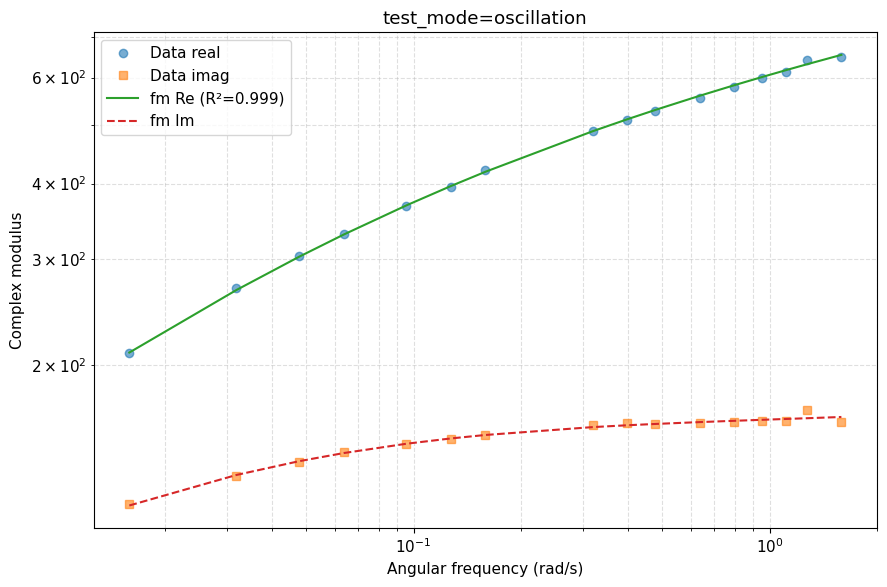

  0%|          | 0/700 [00:00<?, ?it/s]

warmup:   0%|          | 1/700 [00:00<04:20,  2.69it/s, 1 steps of size 1.65e+00. acc. prob=0.00]

warmup:  12%|█▏        | 81/700 [00:00<00:02, 217.98it/s, 511 steps of size 1.21e-03. acc. prob=0.93]

warmup:  18%|█▊        | 125/700 [00:00<00:02, 191.97it/s, 511 steps of size 2.53e-03. acc. prob=0.95]

warmup:  22%|██▏       | 157/700 [00:00<00:03, 177.54it/s, 1023 steps of size 1.50e-03. acc. prob=0.95]

warmup:  26%|██▌       | 182/700 [00:01<00:02, 179.18it/s, 1023 steps of size 2.56e-03. acc. prob=0.95]

sample:  29%|██▉       | 205/700 [00:01<00:02, 179.69it/s, 1023 steps of size 2.57e-03. acc. prob=1.00]

sample:  33%|███▎      | 228/700 [00:01<00:02, 189.56it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  36%|███▌      | 250/700 [00:01<00:02, 194.00it/s, 943 steps of size 2.57e-03. acc. prob=0.99] 

sample:  39%|███▉      | 272/700 [00:01<00:02, 199.16it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  43%|████▎     | 300/700 [00:01<00:01, 218.03it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  46%|████▋     | 324/700 [00:01<00:01, 218.84it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  50%|████▉     | 347/700 [00:01<00:01, 215.62it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  53%|█████▎    | 370/700 [00:01<00:01, 208.24it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  56%|█████▌    | 392/700 [00:02<00:01, 205.32it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  59%|█████▉    | 413/700 [00:02<00:01, 198.99it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  62%|██████▏   | 434/700 [00:02<00:01, 194.92it/s, 631 steps of size 2.57e-03. acc. prob=0.99] 

sample:  65%|██████▌   | 458/700 [00:02<00:01, 204.36it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  69%|██████▊   | 480/700 [00:02<00:01, 197.99it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  71%|███████▏  | 500/700 [00:02<00:01, 195.00it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  74%|███████▍  | 520/700 [00:02<00:00, 185.83it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  77%|███████▋  | 539/700 [00:02<00:00, 180.32it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  80%|███████▉  | 558/700 [00:02<00:00, 175.38it/s, 639 steps of size 2.57e-03. acc. prob=0.99] 

sample:  82%|████████▏ | 577/700 [00:03<00:00, 174.13it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  85%|████████▌ | 598/700 [00:03<00:00, 180.19it/s, 511 steps of size 2.57e-03. acc. prob=0.99] 

sample:  88%|████████▊ | 617/700 [00:03<00:00, 180.90it/s, 895 steps of size 2.57e-03. acc. prob=0.99]

sample:  91%|█████████▏| 639/700 [00:03<00:00, 191.25it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  95%|█████████▍| 664/700 [00:03<00:00, 207.78it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample:  98%|█████████▊| 689/700 [00:03<00:00, 219.69it/s, 1023 steps of size 2.57e-03. acc. prob=0.99]

sample: 100%|██████████| 700/700 [00:03<00:00, 191.09it/s, 567 steps of size 2.57e-03. acc. prob=0.99] 

Dataset 0: Bayesian inference complete for fm


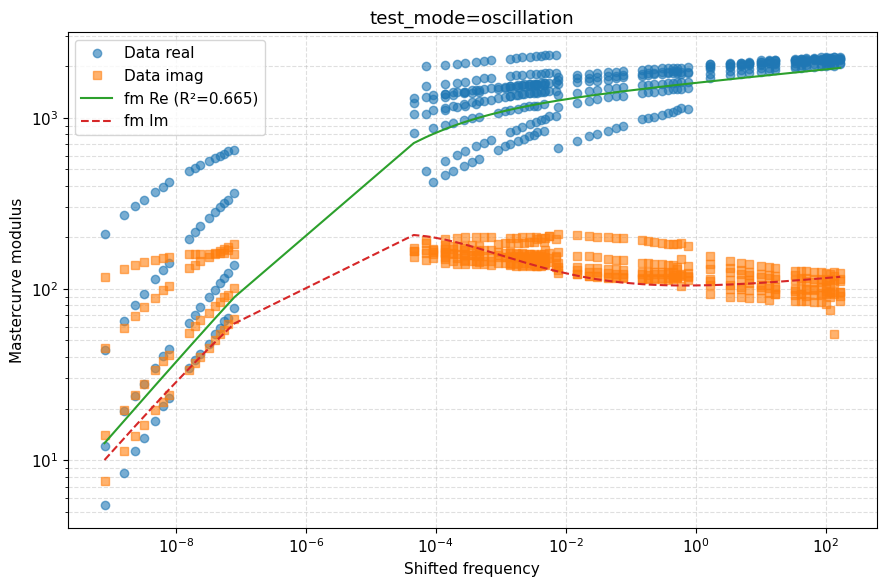

  0%|          | 0/700 [00:00<?, ?it/s]

warmup:   0%|          | 1/700 [00:00<03:19,  3.50it/s, 1 steps of size 1.65e+00. acc. prob=0.00]

warmup:   4%|▍         | 30/700 [00:00<00:06, 98.43it/s, 31 steps of size 3.36e-04. acc. prob=0.86]

warmup:  10%|▉         | 68/700 [00:00<00:03, 187.32it/s, 127 steps of size 1.06e-03. acc. prob=0.93]

warmup:  14%|█▎        | 95/700 [00:00<00:04, 127.49it/s, 7 steps of size 9.88e-04. acc. prob=0.94]  

warmup:  16%|█▋        | 115/700 [00:01<00:05, 111.68it/s, 23 steps of size 1.15e-02. acc. prob=0.95]

warmup:  19%|█▊        | 131/700 [00:01<00:05, 107.95it/s, 255 steps of size 9.82e-03. acc. prob=0.95]

warmup:  21%|██        | 145/700 [00:01<00:05, 100.67it/s, 767 steps of size 1.05e-02. acc. prob=0.96]

warmup:  22%|██▏       | 157/700 [00:01<00:06, 84.23it/s, 1023 steps of size 5.74e-03. acc. prob=0.95]

warmup:  24%|██▍       | 167/700 [00:01<00:07, 68.24it/s, 511 steps of size 7.47e-03. acc. prob=0.95] 

warmup:  25%|██▌       | 176/700 [00:01<00:07, 71.50it/s, 255 steps of size 9.73e-03. acc. prob=0.96]

warmup:  26%|██▋       | 185/700 [00:02<00:07, 66.67it/s, 511 steps of size 1.26e-02. acc. prob=0.96]

warmup:  28%|██▊       | 195/700 [00:02<00:06, 72.33it/s, 255 steps of size 1.23e-02. acc. prob=0.96]

sample:  29%|██▉       | 203/700 [00:02<00:07, 70.67it/s, 31 steps of size 1.09e-02. acc. prob=1.00] 

sample:  31%|███       | 215/700 [00:02<00:06, 79.85it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  32%|███▏      | 224/700 [00:02<00:06, 74.21it/s, 239 steps of size 1.09e-02. acc. prob=0.99]

sample:  33%|███▎      | 232/700 [00:02<00:06, 71.37it/s, 159 steps of size 1.09e-02. acc. prob=0.99]

sample:  34%|███▍      | 240/700 [00:02<00:06, 72.16it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  35%|███▌      | 248/700 [00:02<00:06, 65.93it/s, 159 steps of size 1.09e-02. acc. prob=0.99]

sample:  36%|███▋      | 255/700 [00:03<00:06, 66.44it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  37%|███▋      | 262/700 [00:03<00:06, 65.25it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  38%|███▊      | 269/700 [00:03<00:06, 62.41it/s, 351 steps of size 1.09e-02. acc. prob=0.99]

sample:  39%|███▉      | 276/700 [00:03<00:06, 64.35it/s, 71 steps of size 1.09e-02. acc. prob=0.99] 

sample:  41%|████      | 284/700 [00:03<00:06, 65.86it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  42%|████▏     | 291/700 [00:03<00:06, 65.21it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  43%|████▎     | 300/700 [00:03<00:05, 70.25it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  44%|████▍     | 308/700 [00:03<00:05, 68.06it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  45%|████▌     | 315/700 [00:03<00:05, 67.72it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  46%|████▌     | 322/700 [00:04<00:05, 65.09it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  47%|████▋     | 329/700 [00:04<00:05, 62.16it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  48%|████▊     | 338/700 [00:04<00:05, 69.48it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  50%|████▉     | 348/700 [00:04<00:04, 77.43it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  51%|█████     | 356/700 [00:04<00:04, 77.52it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  52%|█████▏    | 364/700 [00:04<00:04, 70.24it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  53%|█████▎    | 372/700 [00:04<00:04, 71.12it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  55%|█████▍    | 382/700 [00:04<00:04, 78.90it/s, 127 steps of size 1.09e-02. acc. prob=0.99]

sample:  56%|█████▌    | 391/700 [00:05<00:04, 77.08it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  57%|█████▋    | 399/700 [00:05<00:04, 71.22it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  58%|█████▊    | 407/700 [00:05<00:04, 69.52it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  59%|█████▉    | 415/700 [00:05<00:04, 66.59it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  60%|██████    | 422/700 [00:05<00:04, 66.01it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  61%|██████▏   | 429/700 [00:05<00:04, 66.91it/s, 95 steps of size 1.09e-02. acc. prob=0.99] 

sample:  62%|██████▏   | 437/700 [00:05<00:03, 68.77it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  63%|██████▎   | 444/700 [00:05<00:03, 68.71it/s, 447 steps of size 1.09e-02. acc. prob=0.99]

sample:  64%|██████▍   | 451/700 [00:05<00:03, 67.62it/s, 127 steps of size 1.09e-02. acc. prob=0.99]

sample:  66%|██████▌   | 461/700 [00:06<00:03, 72.47it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  67%|██████▋   | 470/700 [00:06<00:03, 74.83it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  68%|██████▊   | 478/700 [00:06<00:02, 75.15it/s, 47 steps of size 1.09e-02. acc. prob=0.99] 

sample:  69%|██████▉   | 486/700 [00:06<00:03, 70.13it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  71%|███████   | 494/700 [00:06<00:03, 63.07it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  72%|███████▏  | 501/700 [00:06<00:03, 58.83it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  73%|███████▎  | 508/700 [00:06<00:03, 53.44it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  73%|███████▎  | 514/700 [00:06<00:03, 51.10it/s, 383 steps of size 1.09e-02. acc. prob=0.99]

sample:  74%|███████▍  | 520/700 [00:07<00:03, 51.51it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  75%|███████▌  | 526/700 [00:07<00:03, 51.17it/s, 231 steps of size 1.09e-02. acc. prob=0.99]

sample:  76%|███████▌  | 532/700 [00:07<00:03, 52.28it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  77%|███████▋  | 539/700 [00:07<00:02, 56.47it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  78%|███████▊  | 546/700 [00:07<00:02, 59.46it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  79%|███████▉  | 553/700 [00:07<00:02, 59.52it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  80%|████████  | 561/700 [00:07<00:02, 61.92it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  81%|████████▏ | 569/700 [00:07<00:01, 66.59it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  82%|████████▏ | 577/700 [00:07<00:01, 68.42it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  84%|████████▎ | 585/700 [00:08<00:01, 71.63it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  85%|████████▍ | 593/700 [00:08<00:01, 73.01it/s, 359 steps of size 1.09e-02. acc. prob=0.99]

sample:  86%|████████▌ | 601/700 [00:08<00:01, 69.21it/s, 127 steps of size 1.09e-02. acc. prob=0.99]

sample:  87%|████████▋ | 609/700 [00:08<00:01, 70.95it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  88%|████████▊ | 617/700 [00:08<00:01, 71.89it/s, 191 steps of size 1.09e-02. acc. prob=0.99]

sample:  89%|████████▉ | 625/700 [00:08<00:01, 74.12it/s, 191 steps of size 1.09e-02. acc. prob=0.99]

sample:  91%|█████████ | 634/700 [00:08<00:00, 78.11it/s, 351 steps of size 1.09e-02. acc. prob=0.99]

sample:  92%|█████████▏| 642/700 [00:08<00:00, 77.83it/s, 511 steps of size 1.09e-02. acc. prob=0.99]

sample:  93%|█████████▎| 650/700 [00:08<00:00, 77.78it/s, 383 steps of size 1.09e-02. acc. prob=0.99]

sample:  94%|█████████▍| 658/700 [00:09<00:00, 76.03it/s, 127 steps of size 1.09e-02. acc. prob=0.99]

sample:  95%|█████████▌| 666/700 [00:09<00:00, 68.62it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  96%|█████████▋| 674/700 [00:09<00:00, 67.12it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample:  97%|█████████▋| 681/700 [00:09<00:00, 67.47it/s, 47 steps of size 1.09e-02. acc. prob=0.99] 

sample:  98%|█████████▊| 688/700 [00:09<00:00, 67.77it/s, 95 steps of size 1.09e-02. acc. prob=0.99]

sample: 100%|█████████▉| 697/700 [00:09<00:00, 72.24it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

sample: 100%|██████████| 700/700 [00:09<00:00, 72.46it/s, 255 steps of size 1.09e-02. acc. prob=0.99]

Dataset 1: Bayesian inference complete for fm


In [9]:
# Bayesian inference on best model per dataset
def _plot_data_and_fits(ds, fits):
    """Plot data with model fits overlay."""
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot, y_true = ds['X'], ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        ax.loglog(X_plot, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(X_plot, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)

bayes_results = {}  # {dataset_idx: inference_data}

for ds_idx, ds in enumerate(datasets):
    fits = all_fits.get(ds_idx, [])
    if not fits:
        continue

    best = fits[0]
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'], ds['y'], **NUTS_CONFIG, test_mode=ds['test_mode'],
        )
        bayes_results[ds_idx] = bayes_result.to_inference_data()
        print(f"Dataset {ds_idx}: Bayesian inference complete for {best['name']}")
    except Exception as exc:
        print(f"Dataset {ds_idx}: Bayesian step failed for {best['name']}: {exc}")


In [10]:
# ArviZ diagnostics for Bayesian results
def _plot_diagnostics(idata):
    """Generate ArviZ diagnostic plots."""
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
            plt.tight_layout()
            display(obj)
            plt.close('all')
        except Exception as exc:
            print(f"Skipping {name} plot: {exc}")

for ds_idx, idata in bayes_results.items():
    print(f"\n--- Diagnostics for dataset {ds_idx} ---")
    _plot_diagnostics(idata)



--- Diagnostics for dataset 0 ---


array([[<Axes: ylabel='beta'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='c1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='alpha', ylabel='tau'>, <Axes: xlabel='beta'>,
        <Axes: xlabel='c1'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'c1\n0'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_real\n0'}>,
        <Axes: title={'center': 'tau\n0'}>]], dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'beta'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'c1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'beta'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'c1'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau'}, xlabel='Total number of draws', ylabel='ESS'>]],
      dtype=object)


--- Diagnostics for dataset 1 ---


array([[<Axes: ylabel='beta'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='c1'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma_imag'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='sigma_real'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='alpha', ylabel='tau'>, <Axes: xlabel='beta'>,
        <Axes: xlabel='c1'>, <Axes: xlabel='sigma_imag'>,
        <Axes: xlabel='sigma_real'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'c1\n0'}>],
       [<Axes: title={'center': 'sigma_imag\n0'}>,
        <Axes: title={'center': 'sigma_real\n0'}>,
        <Axes: title={'center': 'tau\n0'}>]], dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'beta'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'c1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

array([[<Axes: title={'center': 'alpha'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'beta'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'c1'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau'}, xlabel='Total number of draws', ylabel='ESS'>]],
      dtype=object)